## Pré-processamento de imagem 

In [1]:
from skimage import img_as_ubyte, img_as_float
from skimage.io import imread, imshow, imsave
from skimage.transform import resize
from skimage.exposure import histogram, equalize_hist, adjust_gamma, cumulative_distribution, rescale_intensity, equalize_adapthist 
from skimage.filters import gaussian, laplace
from skimage.color import rgb2gray, gray2rgb

import matplotlib.pyplot as plt

### Redimensionamento e mudança para escala de cinza

(393, 499, 3) (256, 256)


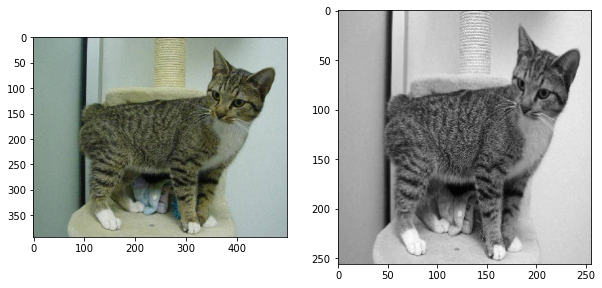

In [2]:
Image = imread("Pets_Dataset/train/cats/cat.2020.jpg")
New = resize(Image, (256, 256))
Gray = rgb2gray(New)

fig, (x1, x2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharex=False, sharey=False)
x1.imshow(Image)
x2.imshow(Gray, cmap = plt.cm.gray)
print (Image.shape, Gray.shape)

### Equalização de Histograma

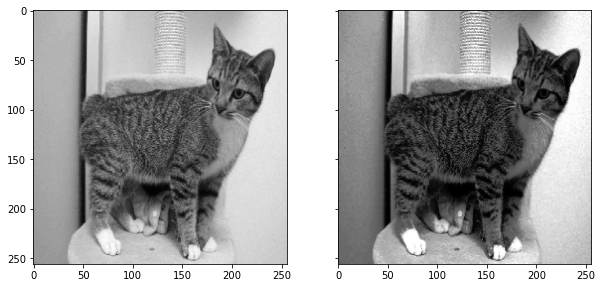

In [3]:
Equalize = equalize_hist(Gray)

fig, (x1, x2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharex=True, sharey=True)
x1.imshow(Gray, cmap = plt.cm.gray)
x2.imshow(Equalize, cmap = plt.cm.gray)

### Correção Gamma

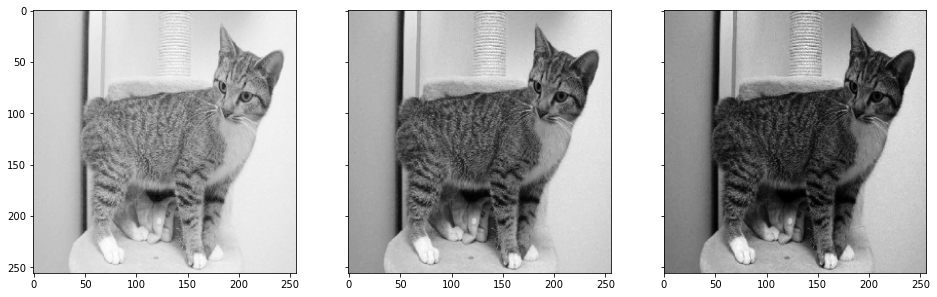

In [4]:
Gamma01 = adjust_gamma (Gray, gamma = 0.5, gain = 1)
Gamma02 = adjust_gamma (Gray, gamma = 1, gain = 1)
Gamma03 = adjust_gamma (Gray, gamma = 1.5, gain = 1)

fig, (x1, x2, x3) = plt.subplots(nrows=1, ncols=3, figsize=(16,8), sharex=True, sharey=True)
x1.imshow(Gamma01, cmap = plt.cm.gray)
x2.imshow(Gamma02, cmap = plt.cm.gray)
x3.imshow(Gamma03, cmap = plt.cm.gray)

### Suavização de Imagem

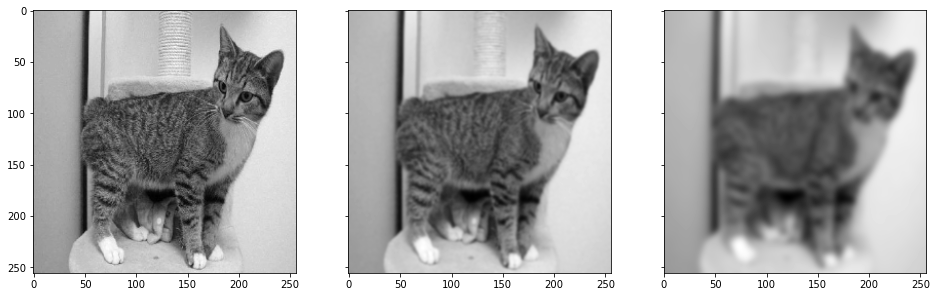

In [6]:
Gaus = gaussian (Gray, sigma = 1)
Gaus2 = gaussian (Gray, sigma = 3)

fig, (x1, x2, x3) = plt.subplots(nrows=1, ncols=3, figsize=(16,8), sharex=True, sharey=True)
x1.imshow(Gray, cmap = plt.cm.gray)
x2.imshow(Gaus, cmap = plt.cm.gray)
x3.imshow(Gaus2, cmap = plt.cm.gray)

### Aguçamento de Imagem

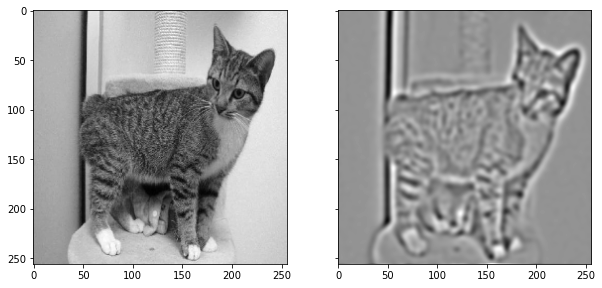

In [7]:
Lp = laplace(Gaus2)

fig, (x1, x2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharex=True, sharey=True)
x1.imshow(Gray, cmap = plt.cm.gray)
x2.imshow(Lp, cmap = plt.cm.gray)

### Visualização dos histogramas

In [8]:
import numpy as np

def plot_img_and_hist(image, axes, bins=256):
    
    image = img_as_float(image)
    ax_img, ax_hist = axes

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='blue')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Intensidade do pixel')
    ax_hist.set_xlim(0, 1)
    #ax_hist.set_yticks([])

    return ax_img, ax_hist

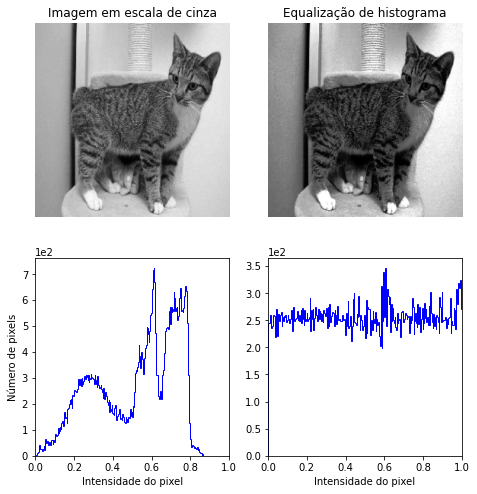

In [9]:
# Equalização de histograma

fig = plt.figure(figsize=(16, 8))
axes = np.zeros((2, 2), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 2):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 2):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist = plot_img_and_hist(Gray, axes[:, 0])
ax_img.set_title('Imagem em escala de cinza')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Número de pixels')
#ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist = plot_img_and_hist(Equalize, axes[:, 1])
ax_img.set_title('Equalização de histograma')

plt.show()

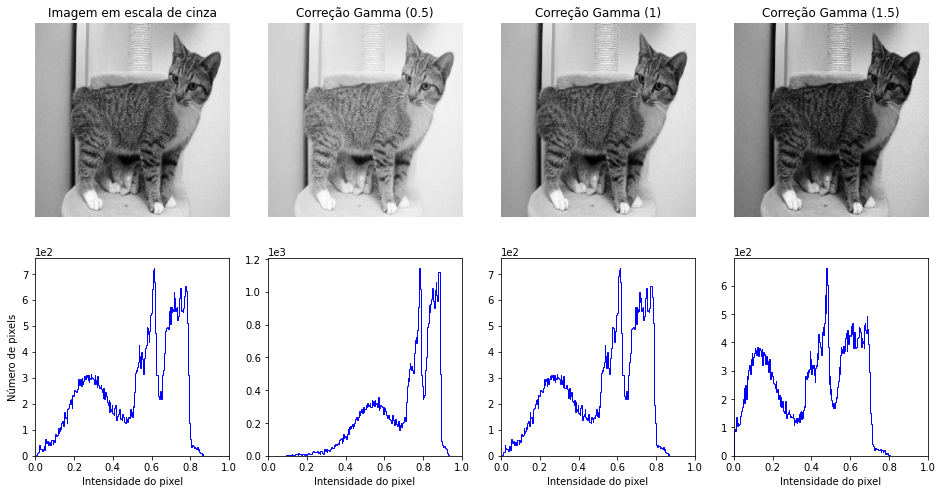

In [10]:
#Correção Gamma

fig = plt.figure(figsize=(16, 8))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist = plot_img_and_hist(Gray, axes[:, 0])
ax_img.set_title('Imagem em escala de cinza')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Número de pixels')
#ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist = plot_img_and_hist(Gamma01, axes[:, 1])
ax_img.set_title('Correção Gamma (0.5)')

ax_img, ax_hist = plot_img_and_hist(Gamma02, axes[:, 2])
ax_img.set_title('Correção Gamma (1)')

ax_img, ax_hist = plot_img_and_hist(Gamma03, axes[:, 3])
ax_img.set_title('Correção Gamma (1.5)')

plt.show()

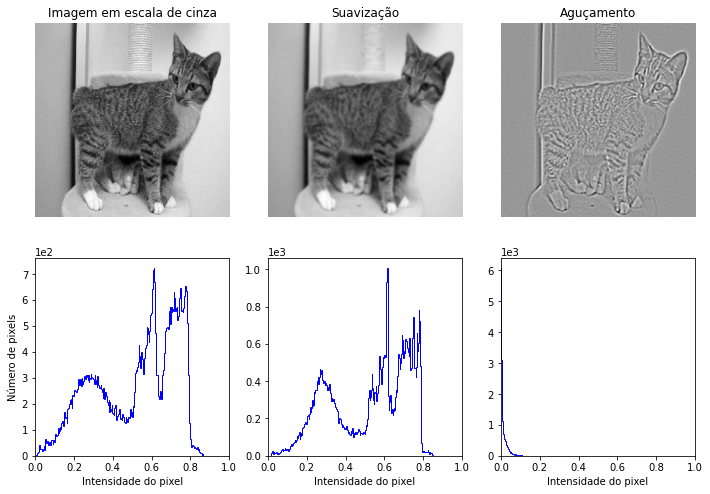

In [11]:
#Suavização de Imagem
Gaus = gaussian (Gray, sigma = 1)

#Aguçamento de Imagem
Lp = laplace(Gaus)

# Display results
fig = plt.figure(figsize=(16, 8))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 3):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 3):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist = plot_img_and_hist(Gray, axes[:, 0])
ax_img.set_title('Imagem em escala de cinza')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Número de pixels')
#ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist = plot_img_and_hist(Gaus, axes[:, 1])
ax_img.set_title('Suavização')

ax_img, ax_hist = plot_img_and_hist(Lp, axes[:, 2])
ax_img.set_title('Aguçamento')

plt.show()

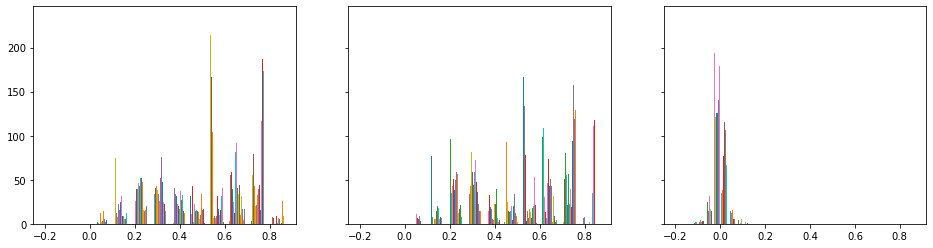

In [12]:
fig, (x1, x2, x3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 4), sharex=True, sharey=True)
A = x1.hist(Gray)
B = x2.hist(Gaus)
C = x3.hist(Lp)

# Prática 01

## Padronizando Dataset

In [1]:
from skimage import img_as_ubyte
from skimage.io import ImageCollection, imsave
from skimage.transform import resize

In [2]:
CatsTest = ImageCollection("Pets_Dataset/test/cats/*jpg")
for i, files in enumerate(CatsTest):
    New = resize(files,(128, 128))
    name = str(i)+".jpg"
    img = img_as_ubyte(New)
    imsave("NewDataset/Test/Cats/"+name, img)

In [3]:
DogsTest = ImageCollection("Pets_Dataset/test/dogs/*jpg")
for i, files in enumerate(DogsTest):
    New = resize(files,(128, 128))
    name = str(i)+".jpg"
    img = img_as_ubyte(New)
    imsave("NewDataset/Test/Dogs/"+name, img)

In [4]:
CatsTrain = ImageCollection("Pets_Dataset/train/cats/*jpg")
for i, files in enumerate(CatsTrain):
    New = resize(files,(128, 128))
    name = str(i)+".jpg"
    img = img_as_ubyte(New)
    imsave("NewDataset/Train/Cats/"+name, img)

In [5]:
DogsTrain = ImageCollection("Pets_Dataset/train/dogs/*jpg")
for i, files in enumerate(DogsTrain):
    New = resize(files,(128, 128))
    name = str(i)+".jpg"
    img = img_as_ubyte(New)
    imsave("NewDataset/Train/Dogs/"+name, img)

In [6]:
CatsTest = ImageCollection("NewDataset/Test/Cats/*jpg")
DogsTest = ImageCollection("NewDataset/Test/Dogs/*jpg")
CatsTrain = ImageCollection("NewDataset/Train/Cats/*jpg")
DogsTrain = ImageCollection("NewDataset/Train/Dogs/*jpg")

### Roteiro I

In [7]:
from skimage import img_as_ubyte
from skimage.io import imread, imshow, imsave
from skimage.transform import resize
from skimage.color import rgb2gray, gray2rgb
from skimage.exposure import histogram, equalize_hist, adjust_gamma
from skimage.filters import gaussian, laplace

In [8]:
#Equalização de Histograma

for i, image in enumerate(CatsTest):
    Gray = rgb2gray(image)
    Hist = equalize_hist(Gray)
    name = str(i)+".jpg"
    img = img_as_ubyte(Hist)
    imsave("NewDataset/Histogram/Test/Cats/"+name, img)
    
for i, image in enumerate(DogsTest):
    Gray = rgb2gray(image)
    Hist = equalize_hist(Gray)
    name = str(i)+".jpg"
    img = img_as_ubyte(Hist)
    imsave("NewDataset/Histogram/Test/Dogs/"+name, img)

for i, image in enumerate(CatsTrain):
    Gray = rgb2gray(image)
    Hist = equalize_hist(Gray)
    name = str(i)+".jpg"
    img = img_as_ubyte(Hist)
    imsave("NewDataset/Histogram/Train/Cats/"+name, img)
    
for i, image in enumerate(DogsTrain):
    Gray = rgb2gray(image)
    Hist = equalize_hist(Gray)
    name = str(i)+".jpg"
    img = img_as_ubyte(Hist)
    imsave("NewDataset/Histogram/Train/Dogs/"+name, img)

In [9]:
#Correção Gamma01

for i, image in enumerate(CatsTest):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma01 = adjust_gamma(Gray, gamma = 1, gain = 1)
    img = img_as_ubyte(Gamma01)
    imsave("NewDataset/Gamma/Test/Cats/Gamma01/"+name, img)
    
for i, image in enumerate(DogsTest):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma01 = adjust_gamma(Gray, gamma = 1, gain = 1)
    img = img_as_ubyte(Gamma01)
    imsave("NewDataset/Gamma/Test/Dogs/Gamma01/"+name, img)

for i, image in enumerate(CatsTrain):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma01 = adjust_gamma(Gray, gamma = 1, gain = 1)
    img = img_as_ubyte(Gamma01)
    imsave("NewDataset/Gamma/Train/Cats/Gamma01/"+name, img)

for i, image in enumerate(DogsTrain):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma01 = adjust_gamma(Gray, gamma = 1, gain = 1)
    img = img_as_ubyte(Gamma01)
    imsave("NewDataset/Gamma/Train/Dogs/Gamma01/"+name, img)

In [10]:
#Correção Gamma02

for i, image in enumerate(CatsTest):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma02 = adjust_gamma(Gray, gamma = 0.5, gain = 1)
    img = img_as_ubyte(Gamma02)
    imsave("NewDataset/Gamma/Test/Cats/Gamma02/"+name, img)
    
for i, image in enumerate(DogsTest):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma02 = adjust_gamma(Gray, gamma = 0.5, gain = 1)
    img = img_as_ubyte(Gamma02)
    imsave("NewDataset/Gamma/Test/Dogs/Gamma02/"+name, img)
    
for i, image in enumerate(CatsTrain):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma02 = adjust_gamma(Gray, gamma = 0.5, gain = 1)
    img = img_as_ubyte(Gamma02)
    imsave("NewDataset/Gamma/Train/Cats/Gamma02/"+name, img)
    
for i, image in enumerate(DogsTrain):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma02 = adjust_gamma(Gray, gamma = 0.5, gain = 1)
    img = img_as_ubyte(Gamma02)
    imsave("NewDataset/Gamma/Train/Dogs/Gamma02/"+name, img)


In [11]:
#Correção Gamma03

for i, image in enumerate(CatsTest):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma03 = adjust_gamma(Gray, gamma = 1.5, gain = 1)
    img = img_as_ubyte(Gamma03)
    imsave("NewDataset/Gamma/Test/Cats/Gamma03/"+name, img)
for i, image in enumerate(DogsTest):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma03 = adjust_gamma(Gray, gamma = 1.5, gain = 1)
    img = img_as_ubyte(Gamma03)
    imsave("NewDataset/Gamma/Test/Dogs/Gamma03/"+name, img)
for i, image in enumerate(CatsTrain):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma03 = adjust_gamma(Gray, gamma = 1.5, gain = 1)
    img = img_as_ubyte(Gamma03)
    imsave("NewDataset/Gamma/Train/Cats/Gamma03/"+name, img)
for i, image in enumerate(DogsTrain):
    name = str(i)+".jpg"
    Gray = rgb2gray(image)
    Gamma03 = adjust_gamma(Gray, gamma = 1.5, gain = 1)
    img = img_as_ubyte(Gamma03)
    imsave("NewDataset/Gamma/Train/Dogs/Gamma03/"+name, img)

In [18]:
#Suavização de Imagem

for i, image in enumerate(CatsTest):
    Gray = rgb2gray(image)
    Gaus = gaussian(Gray, sigma = 1)
    name = str(i)+".jpg"
    img = img_as_ubyte(Gaus)
    imsave("NewDataset/Gaussiano/Test/Cats/"+name, img)
    
for i, image in enumerate(DogsTest):
    Gray = rgb2gray(image)
    Gaus = gaussian(Gray, sigma = 1)
    name = str(i)+".jpg"
    img = img_as_ubyte(Gaus)
    imsave("NewDataset/Gaussiano/Test/Dogs/"+name, img)

for i, image in enumerate(CatsTrain):
    Gray = rgb2gray(image)
    Gaus = gaussian(Gray, sigma = 1)
    name = str(i)+".jpg"
    img = img_as_ubyte(Gaus)
    imsave("NewDataset/Gaussiano/Train/Cats/"+name, img)
    
for i, image in enumerate(DogsTrain):
    Gray = rgb2gray(image)
    Gaus = gaussian(Gray, sigma = 1)
    name = str(i)+".jpg"
    img = img_as_ubyte(Gaus)
    imsave("NewDataset/Gaussiano/Train/Dogs/"+name, img)

In [19]:
CatsTestGaus = ImageCollection("NewDataset/Gaussiano//Test/Cats/*jpg")
DogsTestGaus = ImageCollection("NewDataset/Gaussiano/Test/Dogs/*jpg")
CatsTrainGaus = ImageCollection("NewDataset/Gaussiano/Train/Cats/*jpg")
DogsTrainGaus = ImageCollection("NewDataset/Gaussiano/Train/Dogs/*jpg")

In [24]:
#Aguçamento de Imagem

for i, image in enumerate(CatsTestGaus):
    Lp = laplace(image)
    name = str(i)+".jpg"
    img = img_as_ubyte(Lp)
    imsave("NewDataset/Laplace/Test/Cats/"+name, img)
    
for i, image in enumerate(CatsTestGaus):
    Lp = laplace(image)
    name = str(i)+".jpg"
    img = img_as_ubyte(Lp)
    imsave("NewDataset/Laplace/Test/Dogs/"+name, img)
    
for i, image in enumerate(CatsTrainGaus):
    Lp = laplace(image)
    name = str(i)+".jpg"
    img = img_as_ubyte(Lp)
    imsave("NewDataset/Laplace/Train/Cats/"+name, img)
    
for i, image in enumerate(DogsTrainGaus):
    Lp = laplace(image)
    name = str(i)+".jpg"
    img = img_as_ubyte(Lp)
    imsave("NewDataset/Laplace/Train/Dogs/"+name, img)

/home/lais/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: NewDataset/Laplace/Test/Cats/185.jpg is a low contrast image
  import sys
/home/lais/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: NewDataset/Laplace/Test/Cats/244.jpg is a low contrast image
  import sys
/home/lais/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: NewDataset/Laplace/Test/Cats/257.jpg is a low contrast image
  import sys
/home/lais/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: NewDataset/Laplace/Test/Cats/1044.jpg is a low contrast image
  import sys
/home/lais/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: NewDataset/Laplace/Test/Cats/1500.jpg is a low contrast image
  import sys
/home/lais/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: NewDataset/Laplace/Test/Cats/1607.jpg is a low contrast image
  import sys
/home/lais/anaconda3/lib/python

### Roteiro II

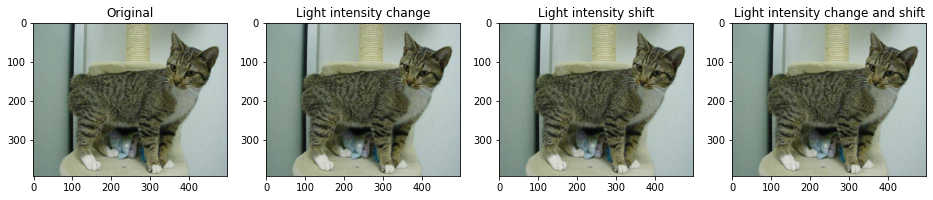

In [4]:
Original = imread("Pets_Dataset/train/cats/cat.2020.jpg")

RedMultiplier = [1, 0, 0]
GreenMultiplier = [0, 1, 0]
BlueMultiplier = [0, 0, 1]

Shift = [1, 1, 1]


# Light intensity change
TC1 = (RedMultiplier * Original)+(GreenMultiplier * Original)+(BlueMultiplier * Original)
# Light intensity shift
TC2 = Original + Shift
#Light intensity change anda shift
TC3 = TC1 + Shift

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(16, 8))

ax0.imshow(Original)
ax0.set_title('Original')
ax1.imshow(TC1)
ax1.set_title('Light intensity change')
ax2.imshow(TC2)
ax2.set_title('Light intensity shift')
ax3.imshow(TC3)
ax3.set_title('Light intensity change and shift')

plt.show()

/home/lais/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:525: UserWarning: Downcasting int64 to uint8 without scaling because max value 251 fits in uint8
  return _convert(image, np.uint8, force_copy)
/home/lais/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:525: UserWarning: Downcasting int64 to uint8 without scaling because max value 252 fits in uint8
  return _convert(image, np.uint8, force_copy)


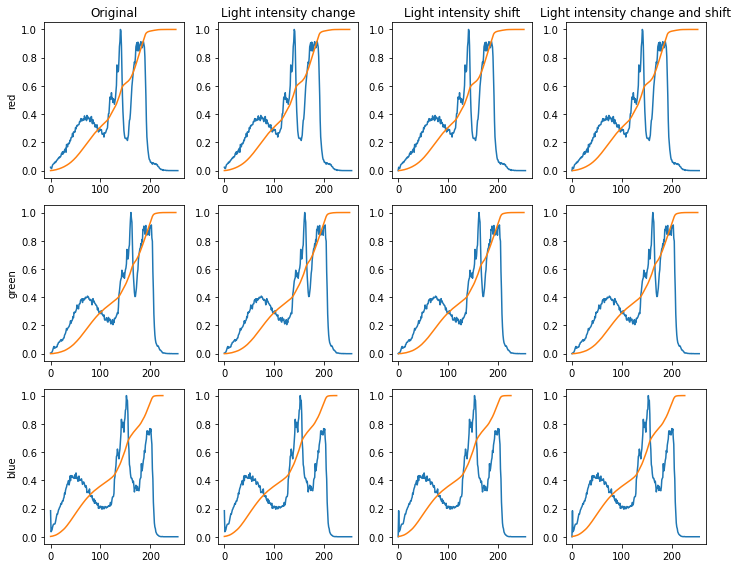

In [5]:
TC1 = img_as_ubyte(TC1)
TC2 = img_as_ubyte(TC2)
TC3 = img_as_ubyte(TC3)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 8))

for i, img in enumerate((Original, TC1, TC2, TC3)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = histogram(img[..., c], source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Original')
axes[0, 1].set_title('Light intensity change')
axes[0, 2].set_title('Light intensity shift')
axes[0, 3].set_title('Light intensity change and shift')

plt.tight_layout()
plt.show()

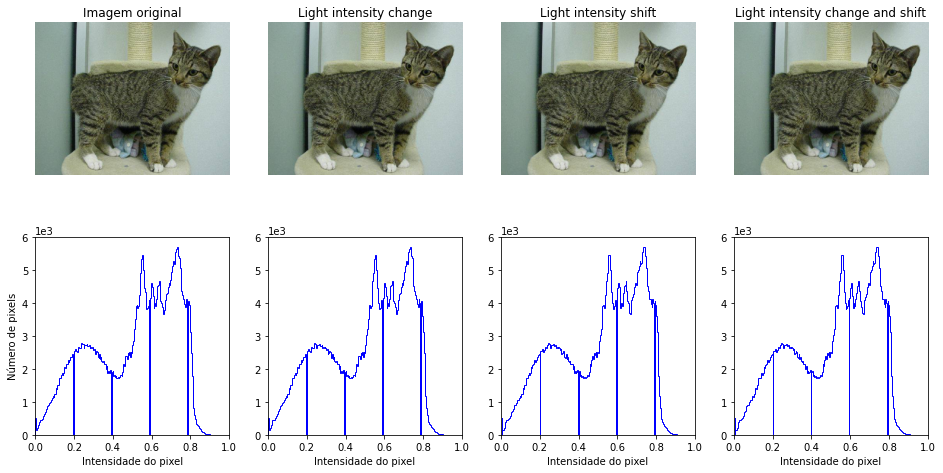

In [8]:
# Histograma RGB

# Display results
fig = plt.figure(figsize=(16, 8))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist = plot_img_and_hist(Original, axes[:, 0])
ax_img.set_title('Imagem original')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Número de pixels')
#ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist = plot_img_and_hist(TC1, axes[:, 1])
ax_img.set_title('Light intensity change')

ax_img, ax_hist = plot_img_and_hist(TC2, axes[:, 2])
ax_img.set_title('Light intensity shift')

ax_img, ax_hist = plot_img_and_hist(TC3, axes[:, 3])
ax_img.set_title('Light intensity change and shift')

plt.show()

In [ ]:
# O1,O2

In [ ]:
# Transformada de cor

# Prática 02

In [1]:
from numpy import array, matrix, reshape
from matplotlib.pyplot import subplots, tight_layout
from os.path import basename
from skimage.io import imread, imshow, imsave, ImageCollection
import h5py
import numpy as np

In [2]:
CatsTestHist = ImageCollection("NewDataset/Histogram/Test/Cats/*jpg")
DogsTestHist = ImageCollection("NewDataset/Histogram/Test/Dogs/*jpg")

CatsTestGamma01 = ImageCollection("NewDataset/Gamma/Test/Cats/Gamma01/*jpg")
DogsTestGamma01 = ImageCollection("NewDataset/Gamma/Test/Dogs/Gamma01/*jpg")

CatsTestGamma02 = ImageCollection("NewDataset/Gamma/Test/Cats/Gamma02/*jpg")
DogsTestGamma02 = ImageCollection("NewDataset/Gamma/Test/Dogs/Gamma02/*jpg")

CatsTestGamma03 = ImageCollection("NewDataset/Gamma/Test/Cats/Gamma03/*jpg")
DogsTestGamma03 = ImageCollection("NewDataset/Gamma/Test/Dogs/Gamma03/*jpg")

CatsTestGauss = ImageCollection("NewDataset/Gaussiano/Test/Cats/*jpg")
DogsTestGauss = ImageCollection("NewDataset/Gaussiano/Test/Dogs/*jpg")

CatsTestLP = ImageCollection("NewDataset/Laplace/Test/Cats/*jpg")
DogsTestLP = ImageCollection("NewDataset/Laplace/Test/Dogs/*jpg")

In [3]:
CatsTrainHist = ImageCollection("NewDataset/Histogram/Train/Cats/*jpg")
DogsTrainHist = ImageCollection("NewDataset/Histogram/Train/Dogs/*jpg")

CatsTrainGamma01 = ImageCollection("NewDataset/Gamma/Train/Cats/Gamma01/*jpg")
DogsTrainGamma01 = ImageCollection("NewDataset/Gamma/Train/Dogs/Gamma01/*jpg")

CatsTrainGamma02 = ImageCollection("NewDataset/Gamma/Train/Cats/Gamma02/*jpg")
DogsTrainGamma02 = ImageCollection("NewDataset/Gamma/Train/Dogs/Gamma02/*jpg")

CatsTrainGamma03 = ImageCollection("NewDataset/Gamma/Train/Cats/Gamma03/*jpg")
DogsTrainGamma03 = ImageCollection("NewDataset/Gamma/Train/Dogs/Gamma03/*jpg")

CatsTrainGaus = ImageCollection("NewDataset/Gaussiano/Train/Cats/*jpg")
DogsTrainGaus = ImageCollection("NewDataset/Gaussiano/Train/Dogs/*jpg")

CatsTrainLP = ImageCollection("NewDataset/Laplace/Train/Cats/*jpg")
DogsTrainLP = ImageCollection("NewDataset/Laplace/Train/Dogs/*jpg")

In [12]:
Original = imread("NewDataset/Laplace/Test/Cats/4999.jpg")
#imshow(Original)
print (Original.dtype, Original.shape, Original.itemsize)

uint8 (128, 128) 1


In [4]:
def matriz(nRows):
    matriz = []
    for i in range(nRows):
        row = []
        matriz.append(row)
    return matriz

### Roteiro I

In [5]:
from skimage.feature import local_binary_pattern
from skimage import img_as_ubyte

In [6]:
from pandas import Series, DataFrame

In [ ]:
#LBP test

Hist = []

for i, files in enumerate(CatsTestHist):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Hist.insert(i, number)
for i, files in enumerate(DogsTestHist):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Hist.insert(i, number)

Gamma01 = []

for i, files in enumerate(CatsTestGamma01):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gamma01.insert(i, number)
for i, files in enumerate(DogsTestGamma01):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gamma01.insert(i, number)

Gamma02 = []

for i, files in enumerate(CatsTestGamma02):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gamma02.insert(i, number)
for i, files in enumerate(DogsTestGamma02):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gamma02.insert(i, number)
        
Gamma03 = []

for i, files in enumerate(CatsTestGamma03):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gamma03.insert(i, number)
for i, files in enumerate(DogsTestGamma03):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gamma03.insert(i, number)

Gauss = []

for i, files in enumerate(CatsTestGauss):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gauss.insert(i, number)
for i, files in enumerate(DogsTestGauss):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Gauss.insert(i, number)
        
Laplace = []

for i, files in enumerate(CatsTestLP):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Laplace.insert(i, number)
for i, files in enumerate(DogsTestLP):
    LBPtest = local_binary_pattern(files, 8, 1.0).reshape(1, -1)
    for number in LBPtest:
        Laplace.insert(i, number)

In [ ]:
Hist

In [ ]:
LBP = matriz(10000)
Label = []

for i, rows in enumerate(LBP):
    LBP[i] = np.concatenate((Hist[i], Gamma01[i], Gamma02[i], Gamma03[i], Gauss[i], Laplace[i]), axis=None)

    if i< 5000:
        Label.insert(i, 0)
    else:
        Label.insert(i, 1)

    LBP[i] = LBP[i].astype("uint8")

In [ ]:
LBPTest = DataFrame(LBP)
LabelLBP = DataFrame(Label)

In [ ]:
LBPTest
LabelLBP

In [ ]:
with h5py.File("LBPTest.h5", 'w') as hdf:
    hdf.create_dataset('datasetTest', data = LBPTest)

In [ ]:
with h5py.File("LabelLBP.h5", 'w') as hdf:
    hdf.create_dataset('datasetlabeltest', data = LabelLBP)

In [ ]:
import h5py

X = "MLP/LBPTest.h5"

with h5py.File(X, "r") as hdf:
    print("Keys: %s" % hdf.keys())
    x = list(hdf.keys())[0]
    
    data = list(hdf[x])
    print(data)

In [ ]:
LBPTest.h5

In [ ]:
LBPTest

In [ ]:
#LBP train

Hist = []

for i, files in enumerate(CatsTrainHist):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Hist.insert(i, number)       
for i, files in enumerate(DogsTrainHist):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Hist.insert(i, number)

Gamma01 = []

for i, files in enumerate(CatsTrainGamma01):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Gamma01.insert(i, number)
for i, files in enumerate(DogsTrainGamma01):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Gamma01.insert(i, number)

Gamma02 = []

for i, files in enumerate(CatsTrainGamma02):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Gamma02.insert(i, number)
for i, files in enumerate(DogsTrainGamma02):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Gamma02.insert(i, number)
        
Gamma03 = []

for i, files in enumerate(CatsTrainGamma03):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Gamma03.insert(i, number)
for i, files in enumerate(DogsTrainGamma03):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Gamma03.insert(i, number)

Gauss = []

for i, files in enumerate(CatsTrainGaus):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Gauss.insert(i, number)
for i, files in enumerate(DogsTrainGaus):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Gauss.insert(i, number)
        
Laplace = []

for i, files in enumerate(CatsTrainLP):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Laplace.insert(i, number)
for i, files in enumerate(DogsTrainLP):
    LBPtrain = local_binary_pattern(files, 8, 1.0).reshape(1, -1).astype("uint8")
    for number in LBPtrain:
        Laplace.insert(i, number)

In [ ]:
LBPTrain = matriz(10000)
LabelTrainLBP = []

for i, rows in enumerate(LBPTrain):
    LBPTrain[i] = np.concatenate((Hist[i], Gamma01[i], Gamma02[i], Gamma03[i], Gauss[i], Laplace[i]), axis=None)

    if i< 5000:
        LabelTrainLBP.insert(i, 0)
    else:
        LabelTrainLBP.insert(i, 1)

    LBPTrain[i] = np.concatenate((LBPTrain[i], LabelTrainLBP[i]), axis = None)

In [ ]:
with h5py.File("LBPtrain.h5", 'w') as hdf:
    hdf.create_dataset('datasettrain', data = LBPTrain)

In [ ]:
with h5py.File("LabelTrainLBP.h5", 'w') as hdf:
    hdf.create_dataset('datasetlabeltrain', data = LabelTrainLBP)

### MLP

In [ ]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(128, 64, 32), random_state=1, early_stopping=True, batch_size=128)

In [ ]:
clf.fit(X, y)                         

In [ ]:
clf.predict(X1)

In [ ]:
clf.score(X1, y1)

In [ ]:
#GLCM train

from skimage.feature import greycomatrix, greycoprops

GLCM = matriz(10000, 7)

for i, files in enumerate(CatsTrainHist):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[i][0].append(GLCMfeature)
for i, files in enumerate(DogsTrainHist):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[5000+i][0].append(GLCMfeature)

for i, files in enumerate(CatsTrainGamma01):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[i][0].append(GLCMfeature)
for i, files in enumerate(DogsTrainGamma01):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[5000+i][0].append(GLCMfeature)
    
for i, files in enumerate(CatsTrainGamma02):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[i][0].append(GLCMfeature)
for i, files in enumerate(DogsTrainGamma02):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[5000+i][0].append(GLCMfeature)
    
for i, files in enumerate(CatsTrainGamma03):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[i][0].append(GLCMfeature)
for i, files in enumerate(DogsTrainGamma03):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[5000+i][0].append(GLCMfeature)
    
for i, files in enumerate(CatsTrainGauss):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[i][0].append(GLCMfeature)
for i, files in enumerate(DogsTrainGauss):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[5000+i][0].append(GLCMfeature)
    
for i, files in enumerate(CatsTrainLP):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[i][0].append(GLCMfeature)    
for i, files in enumerate(DogsTrainLP):
    GLCMtrain = greycomatrix(files, [1], [1])
    GLCMfeature = greycoprops(GLCMtrain, prop='contrast').reshape(1, -1)
    GLCM[5000+i][0].append(GLCMfeature)
    
GLCMTrain = matrix(GLCM)

### Roteiro III

In [ ]:
#SOBEL test

from skimage.filters import sobel

Hist = []

for i, files in enumerate(CatsTestHist):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Hist.insert(i, number)
for i, files in enumerate(DogsTestHist):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Hist.insert(i, number)

Gamma01 = []

for i, files in enumerate(CatsTestGamma01):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma01.insert(i, number)
for i, files in enumerate(DogsTestGamma01):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma01.insert(i, number)
        
Gamma02 = []

for i, files in enumerate(CatsTestGamma02):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma02.insert(i, number)
for i, files in enumerate(DogsTestGamma02):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma02.insert(i, number)
        
Gamma03 = []

for i, files in enumerate(CatsTestGamma03):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma03.insert(i, number)
for i, files in enumerate(DogsTestGamma03):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma03.insert(i, number)

Gauss = []

for i, files in enumerate(CatsTestGauss):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gauss.insert(i, number)
for i, files in enumerate(DogsTestGauss):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gauss.insert(i, number)
        
Laplace = []

for i, files in enumerate(CatsTestLP):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Laplace.insert(i, number)
for i, files in enumerate(DogsTestLP):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Laplace.insert(i, number)

In [ ]:
Hist[0].shape

In [ ]:
SOBEL = matriz(10000)
Label = []

for i, rows in enumerate(SOBEL):
    SOBEL[i] = np.concatenate((Hist[i], Gamma01[i], Gamma02[i], Gamma03[i], Gauss[i], Laplace[i]), axis=None)

    if i< 5000:
        Label.insert(i, 0)
    else:
        Label.insert(i, 1)

    SOBEL[i] = SOBEL[i].astype("uint8")

In [ ]:
SOBELTest = DataFrame(SOBEL)
LabelSOBEL = DataFrame(Label)

In [ ]:
SOBELTest
Label

In [ ]:
with h5py.File("SOBELTest.h5", 'w') as hdf:
    hdf.create_dataset('datasetTestSOBEL', data = SOBELTest)

In [ ]:
with h5py.File("LabelSOBEL.h5", 'w') as hdf:
    hdf.create_dataset('datasetlabeltestSOBEL', data = LabelSOBEL)

In [ ]:
#SOBEL train

from skimage.filters import sobel

Hist = []

for i, files in enumerate(CatsTrainHist):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Hist.insert(i, number)
for i, files in enumerate(DogsTrainHist):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Hist.insert(i, number)

Gamma01 = []

for i, files in enumerate(CatsTrainGamma01):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma01.insert(i, number)
for i, files in enumerate(DogsTrainGamma01):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma01.insert(i, number)
        
Gamma02 = []

for i, files in enumerate(CatsTrainGamma02):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma02.insert(i, number)
for i, files in enumerate(DogsTrainGamma02):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma02.insert(i, number)
        
Gamma03 = []

for i, files in enumerate(CatsTrainGamma03):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma03.insert(i, number)
for i, files in enumerate(DogsTrainGamma03):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gamma03.insert(i, number)

Gauss = []

for i, files in enumerate(CatsTrainGaus):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gauss.insert(i, number)
for i, files in enumerate(DogsTrainGaus):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Gauss.insert(i, number)
        
Laplace = []

for i, files in enumerate(CatsTrainLP):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Laplace.insert(i, number)
for i, files in enumerate(DogsTrainLP):
    SOBELtest = sobel(files).reshape(1, -1)
    for number in SOBELtest:
        Laplace.insert(i, number)

In [ ]:
SOBEL = matriz(10000)
Label = []

for i, rows in enumerate(SOBEL):
    SOBEL[i] = np.concatenate((Hist[i], Gamma01[i], Gamma02[i], Gamma03[i], Gauss[i], Laplace[i]), axis=None)

    if i< 5000:
        Label.insert(i, 0)
    else:
        Label.insert(i, 1)

    SOBEL[i] = SOBEL[i].astype("uint8")

In [ ]:
SOBELTrain = DataFrame(SOBEL)
LabelSOBELTrain = DataFrame(Label)

In [ ]:
with h5py.File("SOBELTrain.h5", 'w') as hdf:
    hdf.create_dataset('datasetTrainSOBEL', data = SOBELTrain)

In [ ]:
with h5py.File("LabelSOBELTrain.h5", 'w') as hdf:
    hdf.create_dataset('datasetlabeltrainSOBEL', data = LabelSOBELTrain)

In [ ]:
#SOBEL train

from skimage.filters import sobel

SOBEL = matriz(10000, 7)

for i, files in enumerate(CatsTrainHist):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[i][0].append(SOBELtrain)
for i, files in enumerate(DogsTrainHist):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[5000+i][0].append(SOBELtrain)

for i, files in enumerate(CatsTrainGamma01):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[i][1].append(SOBELtrain)
for i, files in enumerate(DogsTrainGamma01):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[5000+i][1].append(SOBELtrain)
    
for i, files in enumerate(CatsTrainGamma02):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[i][2].append(SOBELtrain)
for i, files in enumerate(DogsTrainGamma02):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[5000+i][2].append(SOBELtrain)
    
for i, files in enumerate(CatsTrainGamma03):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[i][3].append(SOBELtrain)
for i, files in enumerate(DogsTrainGamma03):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[5000+i][3].append(SOBELtrain)
    
for i, files in enumerate(CatsTrainGauss):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[i][4].append(SOBELtrain)
for i, files in enumerate(DogsTrainGauss):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[5000+i][4].append(SOBELtrain)
    
for i, files in enumerate(CatsTrainLP):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[i][5].append(SOBELtrain)
for i, files in enumerate(DogsTrainLP):
    SOBELtrain = sobel(files).reshape(1, -1)
    SOBEL[5000+i][5].append(SOBELtrain)
    
SOBELTrain = matrix(LBP)

In [ ]:
help(insert)

In [ ]:
#GLCM train

from skimage.feature import greycomatrix, greycoprops

Hist = []

for i, files in enumerate(CatsTrainHist):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Hist.insert(i, number)
for i, files in enumerate(DogsTrainHist):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(files, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Hist.insert(i, number)

Gamma01 = []

for i, files in enumerate(CatsTrainGamma01):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma01.insert(i, number)
for i, files in enumerate(DogsTrainGamma02):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma01.insert(i, number)
        
Gamma02 = []

for i, files in enumerate(CatsTrainGamma02):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma02.insert(i, number)
for i, files in enumerate(DogsTrainGamma02):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma02.insert(i, number)
        
Gamma03 = []

for i, files in enumerate(CatsTrainGamma03):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma03.insert(i, number)
for i, files in enumerate(DogsTrainGamma03):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma03.insert(i, number)
        
Gauss = []

for i, files in enumerate(CatsTrainGaus):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gauss.insert(i, number)
for i, files in enumerate(DogsTrainGaus):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gauss.insert(i, number)
        
Laplace = []

for i, files in enumerate(CatsTrainLP):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Laplace.insert(i, number)
for i, files in enumerate(DogsTrainLP):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Laplace.insert(i, number)

In [ ]:
GLCMTrain = matriz(10000)

for i, rows in enumerate(GLCMTrain):
    GLCMTrain[i] = np.concatenate((Hist[i], Gamma01[i], Gamma02[i], Gamma03[i], Gauss[i], Laplace[i]), axis=None)
    GLCMTrain[i] = GLCMTrain[i].astype("uint8")

In [ ]:
GLCMTrain

In [ ]:
with h5py.File("GLCMTrain.h5", 'w') as hdf:
    hdf.create_dataset('datasetTrainGLCM', data = GLCMTrain)

In [ ]:
#GLCM test

from skimage.feature import greycomatrix, greycoprops

Hist = []

for i, files in enumerate(CatsTestHist):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Hist.insert(i, number)
for i, files in enumerate(DogsTestHist):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(files, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Hist.insert(i, number)

Gamma01 = []

for i, files in enumerate(CatsTestGamma01):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma01.insert(i, number)
for i, files in enumerate(DogsTestGamma02):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma01.insert(i, number)
        
Gamma02 = []

for i, files in enumerate(CatsTestGamma02):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma02.insert(i, number)
for i, files in enumerate(DogsTestGamma02):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma02.insert(i, number)
        
Gamma03 = []

for i, files in enumerate(CatsTestGamma03):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma03.insert(i, number)
for i, files in enumerate(DogsTestGamma03):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gamma03.insert(i, number)
        
Gauss = []

for i, files in enumerate(CatsTestGauss):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gauss.insert(i, number)
for i, files in enumerate(DogsTestGauss):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Gauss.insert(i, number)
        
Laplace = []

for i, files in enumerate(CatsTestLP):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Laplace.insert(i, number)
for i, files in enumerate(DogsTestLP):
    img = files.astype("uint8")
    GLCMtest = greycomatrix(img, [1], [0, np.pi/2])
    GLCMfeature = greycoprops(GLCMtest, prop='contrast')
    for number in GLCMfeature:
        Laplace.insert(i, number)

In [ ]:
GLCM = matriz(10000)

for i, rows in enumerate(GLCM):
    GLCM[i] = np.concatenate((Hist[i], Gamma01[i], Gamma02[i], Gamma03[i], Gauss[i], Laplace[i]), axis=None)
    GLCM[i] = GLCM[i].astype("uint8")

In [ ]:
GLCM

In [ ]:
with h5py.File("GLCMTest.h5", 'w') as hdf:
    hdf.create_dataset('datasetTestGLCM', data = GLCM)

### Classificação

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import metrics
from numpy import concatenate
import h5py

In [ ]:
def matriz(nRows):
    matriz = []
    for i in range(nRows):
        row = []
        matriz.append(row)
    return matriz

GLCMtrain = "GLCMTrain.h5"

with h5py.File(GLCMtrain, "r") as hdf:
    
    x = list(hdf.keys())[0]
    X = list(hdf[x])

Label = "Label.h5"
with h5py.File(Label, "r") as hdf:
    
    Y = list(hdf.keys())[0]
    y1 = list(hdf[Y])

In [ ]:
from random import shuffle

Xy = matriz(10000)

for i, rows in enumerate(Xy):
    Xy[i] = concatenate((X[i], y1[i]), axis = None)

shuffle(Xy)
    
X = matriz(10000)
y = matriz(10000)

for i, rows in enumerate(Xy):
    X[i] = Xy[i][:12]
    y[i] = Xy[i][12]


In [ ]:
X = X[:1000]
y = y[:1000]

In [ ]:
GLCMtest = "GLCMTest.h5"

with h5py.File(GLCMtest, "r") as hdf:
    
    x = list(hdf.keys())[0]
    X1 = list(hdf[x])
    
Xy1 = matriz(10000)

for i, rows in enumerate(Xy1):
    Xy1[i] = concatenate((X1[i], y1[i]), axis = None)

shuffle(Xy1)
    
X1 = matriz(10000)
Y = matriz(10000)

for i, rows in enumerate(Xy1):
    X1[i] = Xy[i][:12]
    Y[i] = Xy[i][12]

In [ ]:
X1 = X1[:1000]
Y = y[:1000]

###### SVM - GLCM

###### Model 01

In [ ]:
clf =  SVC(probability=True)

In [ ]:
clf.fit(X,y)                         

In [ ]:
y_scores = clf.predict(X1)
y_scores

In [ ]:
prob = clf.predict_proba(X1)
prob

In [ ]:
precision = clf.score(X1, Y)
precision

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, y_scores)

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y, prob[:,1], curves='each_class')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y, prob[:,1])
(precision, recall, thresholds)

In [ ]:
import pylab as pl

area = auc(recall, precision)
print("Area Under Curve: %0.2f" % area)

pl.clf()
pl.plot(recall, precision, label='Precision-Recall curve')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.0])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall curve: AUC=%0.2f' % area)
pl.legend(loc="lower left")
pl.show()

In [ ]:
from sklearn.metrics import f1_score

f1_score(y, y_scores, average=None)

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y, y_scores).ravel()
(tn, fp, fn, tp)

###### Model 02

In [ ]:
clf =  SVC(kernel='linear', probability=True)

In [ ]:
clf.fit(X, y)                         

In [ ]:
y_scores = clf.predict(X1)

In [ ]:
prob = clf.predict_proba(X1)

In [ ]:
precision = clf.score(X1, Y) #acurácia
precision

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, y_scores)
(fpr, tpr, thresholds)

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y, prob, curves='each_class')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y, prob[:,1])

In [ ]:
import pylab as pl

area = auc(recall, precision)
print("Area Under Curve: %0.2f" % area)

pl.clf()
pl.plot(recall, precision, label='Precision-Recall curve')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.0])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall curve: AUC=%0.2f' % area)
pl.legend(loc="lower left")
pl.show()

In [ ]:
from sklearn.metrics import f1_score

f1_score(y, y_scores, average=None)

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y, y_scores).ravel()
(tn, fp, fn, tp)

###### Model 03

In [ ]:
clf =  SVC(kernel='poly', gamma = 'auto', probability=True)

In [ ]:
clf.fit(X, y)                         

In [ ]:
y_scores = clf.predict(X1)

In [ ]:
prob = clf.predict_proba(X1)

In [ ]:
precision = clf.score(X1, Y)
precision

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, y_scores)

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y, prob, curves='each_class')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y, prob[:,1])

In [ ]:
import pylab as pl

area = auc(recall, precision)
print("Area Under Curve: %0.2f" % area)

pl.clf()
pl.plot(recall, precision, label='Precision-Recall curve')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.0])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall curve: AUC=%0.2f' % area)
pl.legend(loc="lower left")
pl.show()

In [ ]:
from sklearn.metrics import f1_score

f1_score(y, y_scores, average=None)

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y, y_scores).ravel()
(tn, fp, fn, tp)

###### MLP

###### Model 

In [ ]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(128, 64, 32), random_state=1, early_stopping=True, batch_size=128)

In [ ]:
clf.fit(X, y)                         

In [ ]:
y_scores = clf.predict(X1)

In [ ]:
precision = clf.score(X1, Y)
precision

In [ ]:
prob = clf.predict_proba(X1)

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, y_scores)

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y, prob, curves='each_class')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y, prob[:,1])

In [ ]:
import pylab as pl

area = auc(recall, precision)
print("Area Under Curve: %0.2f" % area)

pl.clf()
pl.plot(recall, precision, label='Precision-Recall curve')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.0])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall curve: AUC=%0.2f' % area)
pl.legend(loc="lower left")
pl.show()

In [ ]:
from sklearn.metrics import f1_score

f1_score(y, y_scores, average=None)

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y, y_scores).ravel()
(tn, fp, fn, tp)